

# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’ .

### Qustion 1:  
   ##### How many number of movies from 1960 until 2015?
   
### Qustion 2:
   ##### What is the top 5 Genres of Movies Taking a Long Runtime From 2000 To 2015?
 
### Qustion 3:
   ##### is the runtime of movies really affect in a popularity?
   
   

In [1]:
# import the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# load dataset

df= pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# To view number of rows and column

df.shape

(10866, 21)

In [4]:
# To view number of duplicated rows

sum(df.duplicated())

1

In [5]:
# To view the total of missing value in each column

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# To view the format of the data and general information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# Also to view format of the data only

df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

   ## Data Cleaning

In [8]:
# remove the duplicated rows

df.drop_duplicates(inplace=True)

In [9]:
# Check the duplicates 

sum(df.duplicated())

0

In [10]:
# to view the column

df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [11]:
# remove uneccary column

df.drop(['imdb_id', 'budget', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
        'vote_count','vote_average','revenue','id' ,'production_companies','vote_average', 'release_date', 'budget_adj',
       'revenue_adj'], axis=1, inplace=True)


In [12]:
# check after drop the column
df.columns

Index(['popularity', 'runtime', 'genres', 'release_year'], dtype='object')

In [13]:
# check if there any null value
df.isnull().sum()

popularity       0
runtime          0
genres          23
release_year     0
dtype: int64

In [14]:
# convert zero value to null value
df['genres'] = df['genres'].replace(0, np.NaN)
df['release_year'] = df['release_year'].replace(0, np.NaN)
df.isnull().sum()

popularity       0
runtime          0
genres          23
release_year     0
dtype: int64

In [15]:
# drop null value
df.dropna(inplace=True)

In [16]:
# check for any null value - should be false 
df.isnull().sum().any()

False

In [17]:
# view dataframe after cleaning
df.head(10)

,popularity,runtime,genres,release_year
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,2015
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,2015
2,13.112507,119,Adventure|Science Fiction|Thriller,2015
3,11.173104,136,Action|Adventure|Science Fiction|Fantasy,2015
4,9.335014,137,Action|Crime|Thriller,2015
5,9.110700,156,Western|Drama|Adventure|Thriller,2015
6,8.654359,125,Science Fiction|Action|Thriller|Adventure,2015
7,7.667400,141,Drama|Adventure|Science Fiction,2015
8,7.404165,91,Family|Animation|Adventure|Comedy,2015
9,6.326804,94,Comedy|Animation|Family,2015


<a id='eda'></a>
## Exploratory Data Analysis

### Q1: Number Of Movies From 1960 Until 2015

In [18]:
# here the number of movies from year 1960 to 2015
df.shape[0]

10842

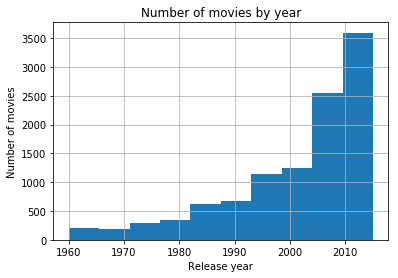

In [19]:
# make histogram to see the number of movies from 1960 until 2015
df.hist('release_year');
plt.title('Number of movies by year')
plt.ylabel('Number of movies')
plt.xlabel('Release year');

### Q2: Top 5 Genres of Movies Taking a Long Runtime From 2000 To 2015

In [20]:
#here take the data years from 2000 until 2015, sort the data by longest runtime and print the top 5 longest runtime by genres
Years= df[df.release_year >= 2000]
RunTime_Sort = Years.sort_values('runtime', axis=0, ascending=False)
RunTime_Sort = RunTime_Sort[['genres','runtime']]
TopFive = RunTime_Sort.head(5)
TopFive

,genres,runtime
3894,Documentary,900
4041,Science Fiction,877
2722,Action|Drama|War,705
6894,Documentary,550
2214,War|Drama|Action|Adventure|History,540


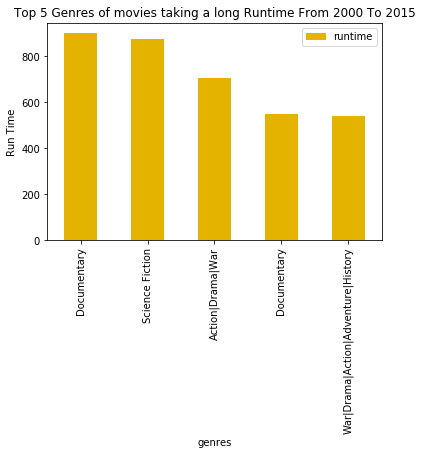

In [21]:
#make bar plot to see the most genres take longest runtime
TopFive.plot(kind='bar', x='genres', y='runtime', color='#e4b300')
plt.title('Top 5 Genres of movies taking a long Runtime From 2000 To 2015')
plt.ylabel('Run Time');

### Q3: is the runtime of movies really affect in a popularity?

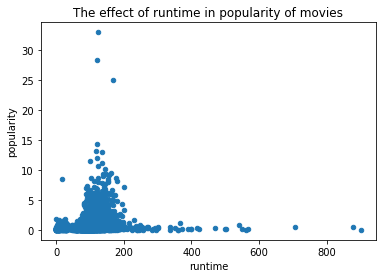

In [22]:
# Scatter plot to see the if runtime affect in popularity
df.plot(kind='scatter',x='runtime',y='popularity');
plt.title('The effect of runtime in popularity of movies');

<a id='conclusions'></a>
## Conclusions
Finaly we finesh project, in this project i faced many problems such as how to convert zeros to null values but i solve it and i invstgate the dataset by Three qustion:

Question 1 | we have the number of movies from 1960 until 2015, the number is growing up from year to year that refers to the new technology makes production easy.

Question 2 | we have the top 5 genres of movies by longest runtime from 2000 until 2015 and we can see the Documentary has longest runtime.

Question 3 | we can see the effect of runtime in popularity of movies, so the movies less than 200 minutes has more popularity than others.


In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295